# Neighborhood-Based Filtering (using openCV)

### julien.rabin (at) ensicaen.fr

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# for Jupyter notebook
%matplotlib inline 

Text(0.5, 1.0, '8 bit BGR format')

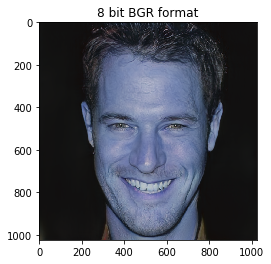

In [7]:
file_name = 'fake.png' # 'flower.jpg'
img_u8 = cv2.imread(file_name) 
plt.imshow(img_u8)
plt.title("8 bit BGR format")

Text(0.5, 1.0, '8 bit RGB format')

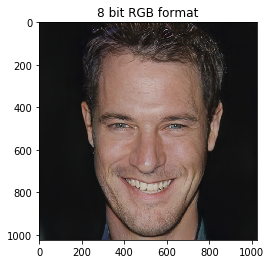

In [8]:
img0_U8 = cv2.cvtColor(img_u8, cv2.COLOR_BGR2RGB)
plt.imshow(img0_U8)
plt.title("8 bit RGB format")

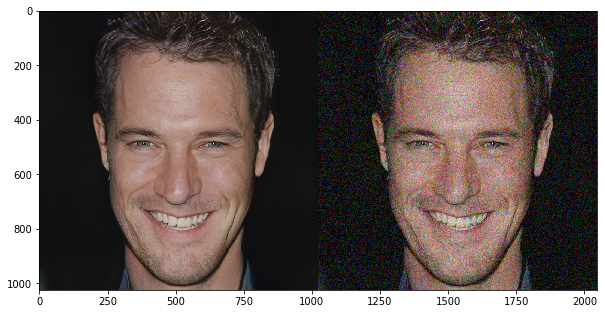

In [9]:
B = img_u8[...,0]
G = img_u8[...,1]
R = img_u8[...,2]
img0 = np.stack((R,G,B),axis=2)
img0 = np.single(img0) / 255 # in [0,1]
img = img0 + 20/255. * np.random.randn(*img0.shape).astype('f')
img = np.clip(img,0.,1.)
plt.figure(figsize = (10,10))
plt.imshow(np.concatenate((img0,img),1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 4095.5, 1023.5, -0.5)

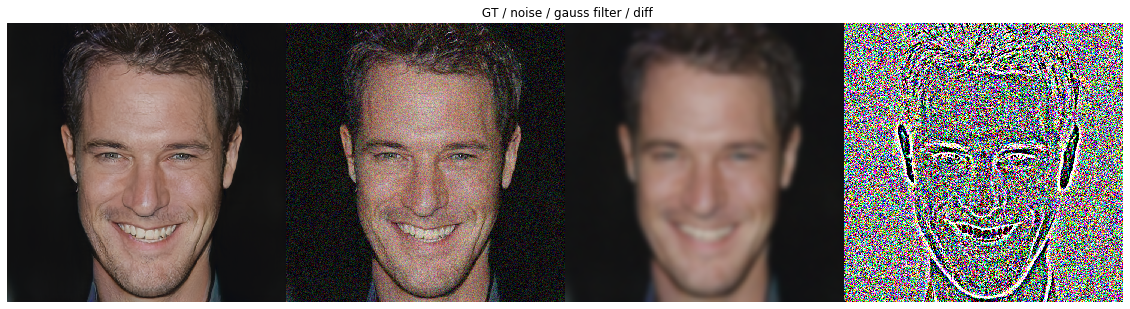

In [10]:
sig_pix = 10.
img_gauss = cv2.GaussianBlur(img,(0,0),sig_pix)
diff = (img_gauss - img) # in [-1,1]
diff = np.clip(10*diff,-1,1) + 0.5 # in [0,1]
res_gauss = np.concatenate((img0, img,img_gauss,diff),axis=1)

plt.figure(figsize=(20,20))
plt.imshow(res_gauss)
plt.title(" GT / noise / gauss filter / diff")
plt.axis("off")

## Bilateral Filtering

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 4095.5, 2047.5, -0.5)

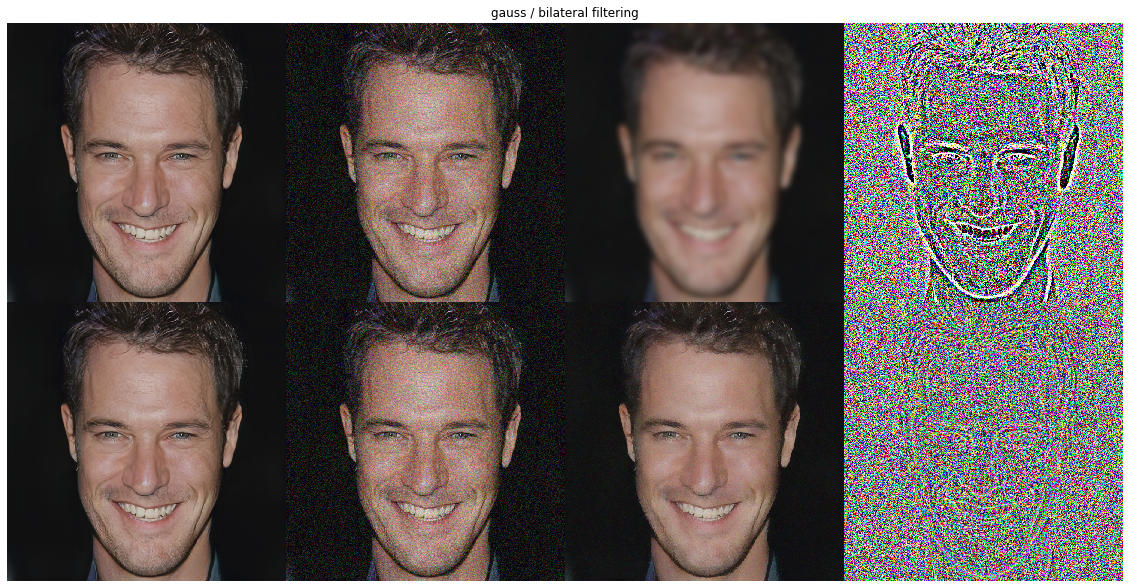

In [11]:
sig_pix = 10.
sig_col = 50./255.
img_bilateral = cv2.bilateralFilter(img,0,sig_col,sig_pix)

diff = (img_bilateral - img) # in [-1,1]
diff = np.clip(10*diff,-1,1) + 0.5 # in [0,1]
res_bilateral = np.concatenate((img0,img,img_bilateral,diff),axis=1)
res = np.concatenate((res_gauss,res_bilateral),axis=0)

plt.figure(figsize=(20,20))
plt.imshow(res)
plt.title("gauss / bilateral filtering")
plt.axis("off")

## Joint / Cross - Bilateral Filtering

see Eisemann and Durand [2004] and Petschnigg et al. [2004] 

In [12]:
"to do"

'to do'

## Non Local Filtering



In [13]:
patch_size = 7
tau_lum = 10.
tau_color = 10.
searchWindowSize = 21
img_U8 = np.uint8(255.*img)
img_NLM = cv2.fastNlMeansDenoisingColored(img_U8, 0, tau_lum, tau_color, patch_size, searchWindowSize) 
img_NLM = np.single(img_NLM)/255. # in [0,1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 4095.5, 2047.5, -0.5)

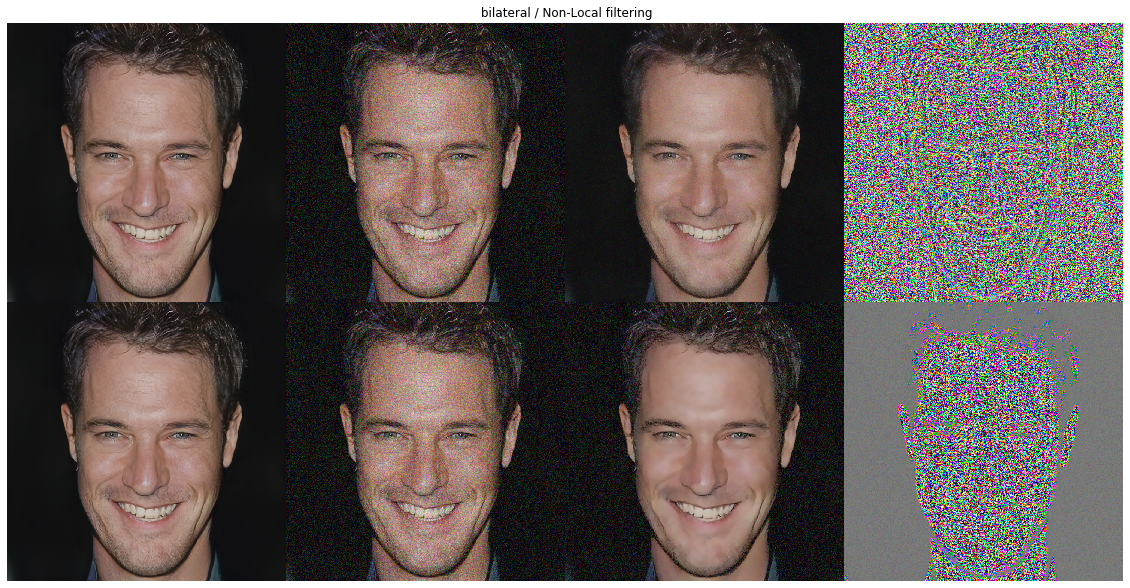

In [14]:
diff = (img_NLM - img) # in [-1,1]
diff = np.clip(10*diff,-1,1) + 0.5 # in [0,1]
res_NLM = np.concatenate((img0,img,img_NLM,diff),axis=1)
res = np.concatenate((res_bilateral,res_NLM),axis=0)

plt.figure(figsize=(20,20))
plt.imshow(res)
plt.title(" bilateral / Non-Local filtering")
plt.axis("off")

(-0.5, 2047.5, 1023.5, -0.5)

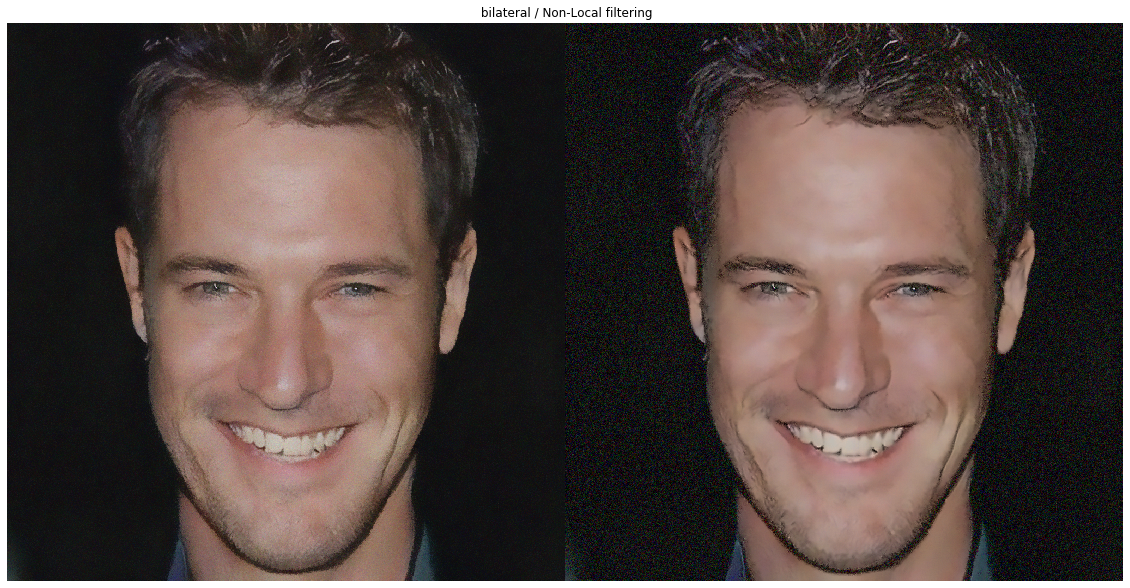

In [60]:
plt.figure(figsize=(20,20))
plt.imshow(np.concatenate((img_bilateral, img_NLM), axis = 1))
plt.title(" bilateral / Non-Local filtering")
plt.axis("off")